In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("bdd.csv", encoding='latin-1')

## DATOS: GCBA - ENCUESTA ANUAL DE HOGARES 2019

Comuna a trabajar: Comuna 11 (Villa del Parque, Devoto, Villa General Mitre, Villa General Mitre)

In [2]:
df_c11 = df[df.comuna == 11].reset_index()

In [3]:
print(df_c11.info())

#En la Comuna 11, hay 728 filas en esta base de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        728 non-null    int64 
 1   id                           728 non-null    int64 
 2   nhogar                       728 non-null    int64 
 3   miembro                      728 non-null    int64 
 4   comuna                       728 non-null    int64 
 5   dominio                      728 non-null    object
 6   edad                         728 non-null    int64 
 7   sexo                         728 non-null    object
 8   parentesco_jefe              728 non-null    object
 9   situacion_conyugal           728 non-null    object
 10  num_miembro_padre            728 non-null    object
 11  num_miembro_madre            728 non-null    object
 12  estado_ocupacional           728 non-null    object
 13  cat_ocupacional              728 no

## PUNTO DE INTERÉS N°1: EDAD
1. Promedio de edad
2. Histograma de edades para ver su distribución
3. Gráfico en forma de violín con la distribución de edades por sexo

In [4]:
df_c11.edad.mean()

#1. Promedio de edad:

41.3228021978022

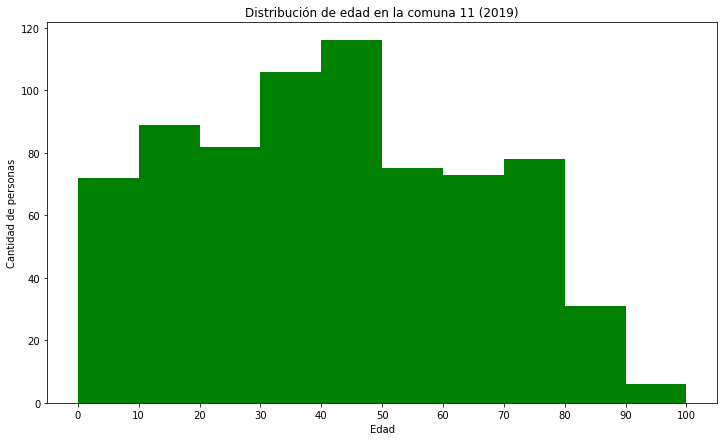

In [5]:
plt.figure(figsize= (12,7))
ax = plt.subplot()
plt.hist(df_c11.edad, range = (0,100), bins = 10, color = "green")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de edad en la comuna 11 (2019)")
plt.show()

#2. Histograma de distribución de edades:

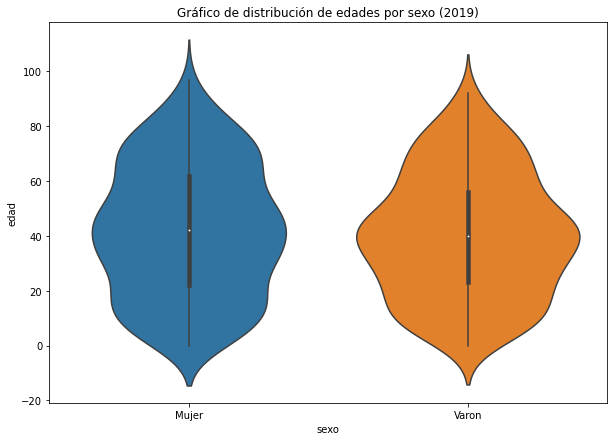

In [6]:
plt.figure(figsize = (10,7))
ax = plt.subplot()
sns.violinplot(data = df_c11, x = "sexo", y = "edad")
plt.title("Gráfico de distribución de edades por sexo (2019)")
plt.show()

#3. Gráfico en forma de violín con la distribución de edades por sexo:

## PUNTO DE INTERÉS 2 : ESTADO OCUPACIONAL
1. Cantidad de personas ocupadas y desocupadas
2. Distribución de edad de personas ocupadas.

In [7]:
ocupadosyno = df_c11.groupby("estado_ocupacional").id.count().reset_index()
ocupadosyno.columns = ["Estado_Ocupacional", "Cantidad"]
print(ocupadosyno)

#1. Cantidad de personas ocupadas, inactivas y desocupadas en la Comuna 11:

  Estado_Ocupacional  Cantidad
0         Desocupado        26
1           Inactivo       316
2            Ocupado       386


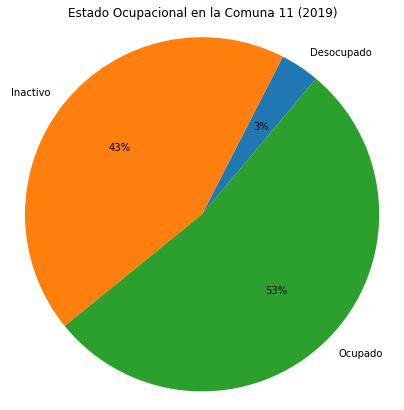

In [8]:
plt.figure(figsize=(7,7))
ax = plt.subplot()
plt.pie(ocupadosyno.Cantidad, labels = ocupadosyno.Estado_Ocupacional, autopct = "%d%%", startangle = 50)
plt.axis("equal")
plt.title("Estado Ocupacional en la Comuna 11 (2019)")
plt.show()

El gráfico anterior puede no ser demasiado representativo, ya que está tomando personas menores de edad, así como gente de, por ejemplo, más de 80 años. A continuación, un gráfico restringiendo los dos rangos etários mencionados:

In [9]:
muestra = df_c11[(df_c11.edad >=18) & (df_c11.edad <= 80)].reset_index()
ocupadosynomuestra = muestra.groupby("estado_ocupacional").id.count().reset_index()
ocupadosynomuestra.columns = ["Estado_Ocupacional", "Cantidad"]
print(ocupadosynomuestra)

#Como se puede ver, baja en gran cantidad la categoría "Inactivo"

  Estado_Ocupacional  Cantidad
0         Desocupado        26
1           Inactivo       137
2            Ocupado       384


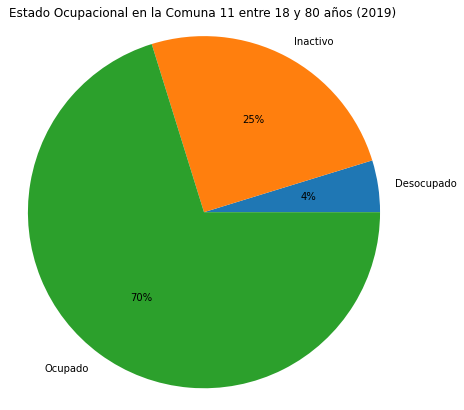

In [10]:
plt.figure(figsize=(7,7))
ax = plt.subplot()
plt.pie(ocupadosynomuestra.Cantidad, labels = ocupadosynomuestra.Estado_Ocupacional, autopct = "%d%%")
plt.axis("equal")
plt.title("Estado Ocupacional en la Comuna 11 entre 18 y 80 años (2019)")
plt.show()

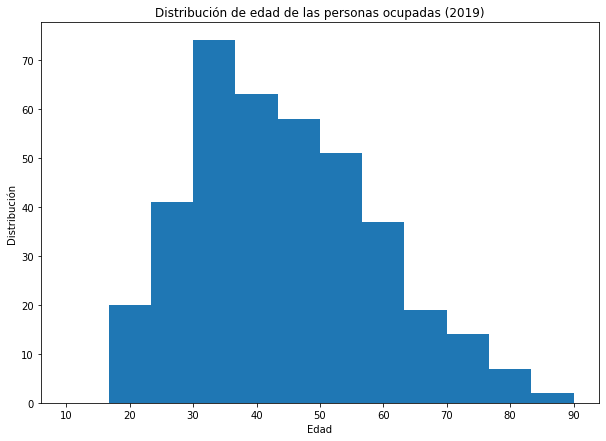

In [11]:
df_ocupados = df_c11[df_c11.estado_ocupacional == "Ocupado"]
plt.figure(figsize=(10,7))
ax = plt.subplot()
plt.hist(df_ocupados.edad, bins = 12 , range = (10,90))
ax.set_xticks([10,20,30,40,50,60,70,80,90])
plt.xlabel("Edad")
plt.ylabel("Distribución")
plt.title("Distribución de edad de las personas ocupadas (2019)")
plt.show()

# 2. Distribución de edad de personas ocupadas:

## PUNTO DE INTERÉS 3: CATEGORÍA OCUPACIONAL
1. Describir las categorías existentes en cuanto a la ocupación dentro de la base de datos.
2. Contar cuántas entradas de la base de datos corresponden a cada categoría.

In [12]:
catoc = df_c11["cat_ocupacional"]
print(catoc.unique())

# 1. Estás son las categorías de la base de datos:

['Asalariado' 'No corresponde' 'Trabajador por cuenta propia'
 'Patron/empleador' 'Trabajador familiar']


In [13]:
cant_co = df_c11.groupby("cat_ocupacional").id.count().reset_index()
cant_co.sort_values(by=['id'], inplace = True, ascending = False)
print(cant_co)

#2. Cuantas personas de la comuna 12 corresponden a cada categoría ocupacional:

                cat_ocupacional   id
1                No corresponde  342
0                    Asalariado  284
4  Trabajador por cuenta propia   77
2              Patron/empleador   21
3           Trabajador familiar    4


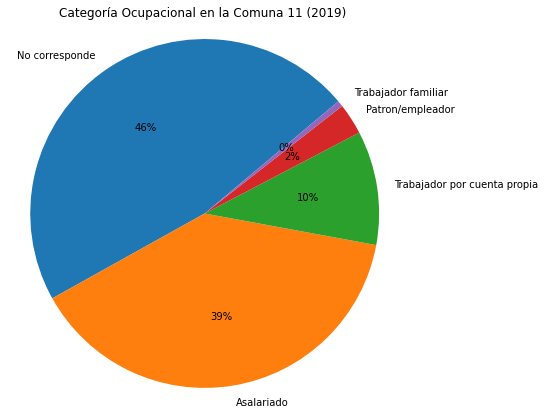

In [14]:
plt.figure(figsize=(7,7))
plt.pie(cant_co.id, labels = cant_co.cat_ocupacional, startangle = 40, autopct = "%d%%", pctdistance = 0.6, labeldistance = 1.1)
plt.axis("equal")
plt.title("Categoría Ocupacional en la Comuna 11 (2019)")
plt.show()

## PUNTO DE INTERÉS 4: CALIDAD DE INGRESOS TOTALES
1. Distinguir las categorías de calidad de ingresos totales.
2. Calcular cuantas personas tuvieron ingresos.
3. Analizar la edad de las personas que tuvieron ingresos.
4. Calcular cuantas personas tuvieron ingresos y declaran monto, para analizar más adelante.

In [15]:
catoc = df_c11["calidad_ingresos_totales"]
print(catoc.unique())

# 1. Estas son las categorías de calidad de ingresos totales:

['Tuvo ingresos y declara monto' 'No corresponde'
 'Tuvo ingresos pero no declara monto' 'No tuvo ingresos']


In [16]:
tuvieron_ingresos = df_c11[(df_c11.calidad_ingresos_totales == "Tuvo ingresos y declara monto") | 
                           (df_c11.calidad_ingresos_totales == "Tuvo ingresos pero no declara monto")].reset_index()
tuving = tuvieron_ingresos.groupby("calidad_ingresos_totales").id.count().reset_index()
tuving.sort_values(by=['id'], inplace = True, ascending = False)
print(tuving)

# 2. Cantidad de personas que declararon haber tenido ingresos en 2019:

              calidad_ingresos_totales   id
1        Tuvo ingresos y declara monto  412
0  Tuvo ingresos pero no declara monto  103


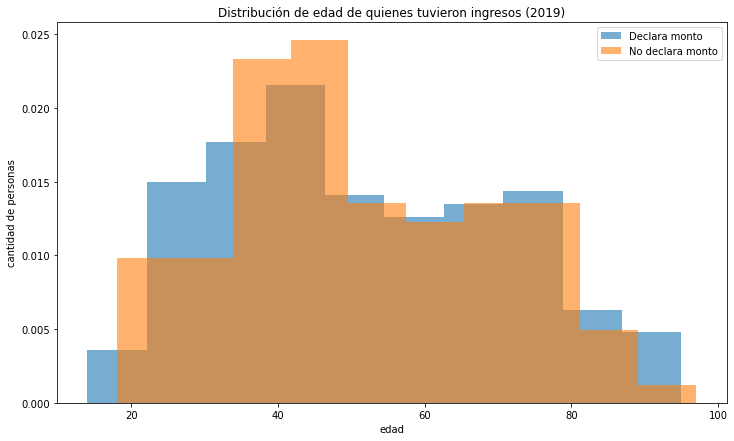

In [17]:
#Tuvo ingresos y declara monto:
ingydecl = df_c11[df_c11.calidad_ingresos_totales == "Tuvo ingresos y declara monto"].reset_index()
ingnodecl = df_c11[df_c11.calidad_ingresos_totales == "Tuvo ingresos pero no declara monto"].reset_index()
plt.figure(figsize = (12,7))
ax = plt.subplot()
plt.hist(ingydecl.edad, bins = 10, alpha = 0.6, density=bool, label = "Declara monto")
plt.hist(ingnodecl.edad, bins = 10, alpha = 0.6, density=bool, label = "No declara monto")
plt.xlabel("edad")
plt.ylabel("cantidad de personas")
plt.legend()
plt.title("Distribución de edad de quienes tuvieron ingresos (2019)")
plt.show()

#3. Distribución de la edad que declara ingresos, con la distinción de los que declaran el monto y los que no lo hacen:

In [18]:
# 4. Las personas que tuvieron ingresos y declaran monto son 412 en la Comuna 11.  

## PUNTO DE INTERÉS 5: INGRESOS TOTALES
1. Promedio de ingresos totales (declarados)
2. Distribución de la cantidad de ingresos totales
3. Ingresos totales por sexo

In [19]:
ingtot = ingydecl["ingresos_totales"]
print("Los ingresos en promedio declarados son $" + str(round(
    ingtot.mean())) + " mensuales en 2019.")

# 1. Promedio de ingresos totales declarados:

Los ingresos en promedio declarados son $38076 mensuales en 2019.


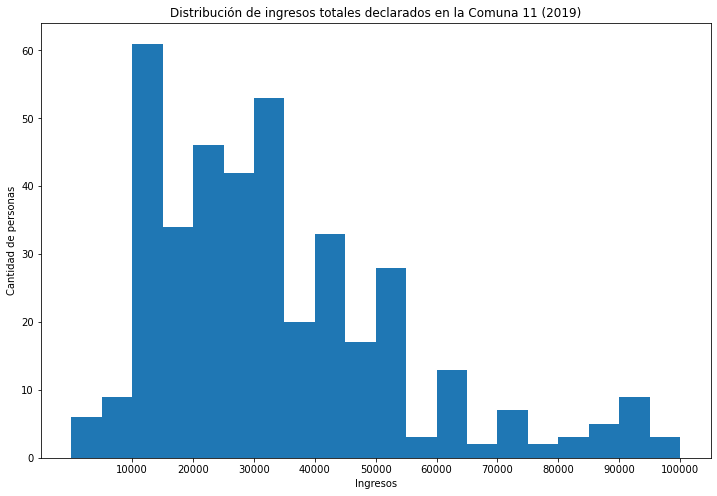

In [20]:
plt.figure(figsize = (12,8))
ax = plt.subplot()
plt.hist(ingtot, range = (0,100000), bins = 20)
ax.set_xticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])
plt.xlabel("Ingresos")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de ingresos totales declarados en la Comuna 11 (2019)")
plt.show()

#2. Distribución de la cantidad de ingresos totales, con una excepción: Muy pocas personas generaban ingresos muy
#altos comparados a los reflejados en el cuadro, por lo que quedaron fuera

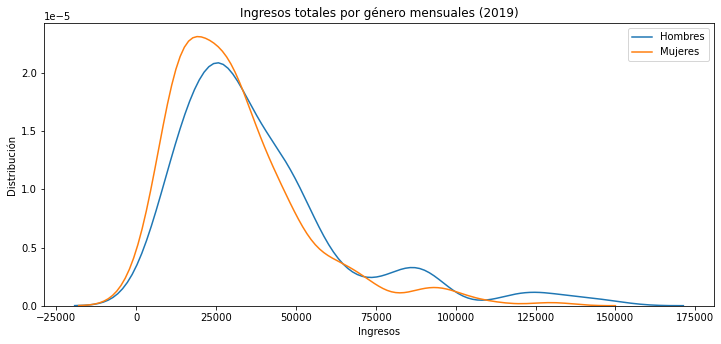

In [21]:
ingtothombres = ingydecl[ingydecl.sexo == "Varon"]
ingtotmujeres = ingydecl[ingydecl.sexo == "Mujer"]

plt.figure(figsize=(12,5.2))
ax = plt.subplot()
sns.kdeplot(ingtothombres.ingresos_totales, label = "Hombres", clip = (0,150000))
sns.kdeplot(ingtotmujeres.ingresos_totales, label = "Mujeres", clip = (0,150000))
plt.title("Ingresos totales por género mensuales (2019)")
plt.ylabel("Distribución")
plt.xlabel("Ingresos")

plt.show()

#3. Ingresos totales por sexo:

## PUNTO DE INTERÉS 6: INGRESO PER CÁPITA
1. Promedio de ingreso per cápita familiar.
2. Mediana de ingreso per cápita familiar.
3. Distribución de ingreso per cápita.

In [22]:
df_c11.calidad_ingresos_familiares.unique()

array(['Tuvo ingresos y declara monto',
       'Tuvo ingresos pero no declara monto', 'No tuvo ingresos'],
      dtype=object)

In [23]:
dfIF = df_c11[df_c11.calidad_ingresos_familiares == "Tuvo ingresos y declara monto"]

promedio_familiar = dfIF.ingreso_per_capita_familiar.mean()
print("El promedio per capita familiar es de $" + str(round(promedio_familiar)))

# 1. Promedio de ingreso per cápita familiar:

El promedio per capita familiar es de $27917


In [24]:
mediana_familiar = dfIF.ingreso_per_capita_familiar.median()
print("La mediana del ingreso per capita familiar es de $" + str(mediana_familiar))
# 2. Mediana de ingreso per cápita familiar:

La mediana del ingreso per capita familiar es de $22100.0


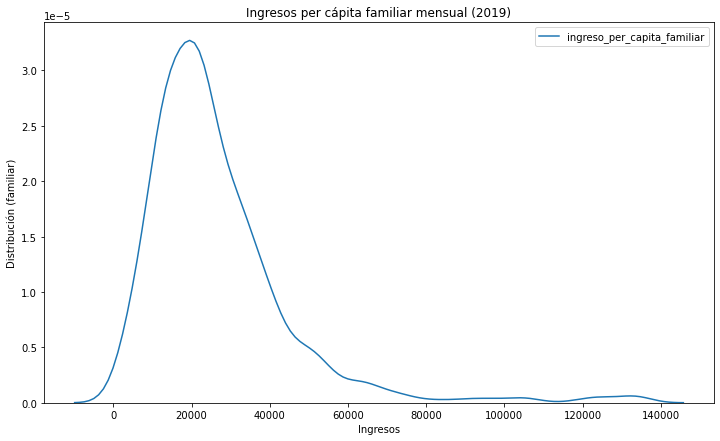

In [25]:
plt.figure(figsize=(12,7))
sns.kdeplot(dfIF.ingreso_per_capita_familiar, clip = (0, 150000))
plt.xlabel("Ingresos")
plt.ylabel("Distribución (familiar)")
plt.title("Ingresos per cápita familiar mensual (2019)")
plt.show()